# Dataset: Credit Card Customer Information

A manager at the bank is disturbed with more and more customers leaving their credit card services. What we are doing here is to predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

# Looking at the dataset at first glance

Loading the dataset into jupyter notebook for visualization.

In [4]:
import pandas as pd

df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# First step in preprocessing the dataset

Since the last two columns is about Naive Bayes predictions, so it is removed.<br>
Dropping "CLIENTNUM" because it is the customers' ID from the bank's perspective.

In [5]:
df = df.drop(columns = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Histogram

**Generating graphs to help us better visualize the dataset**

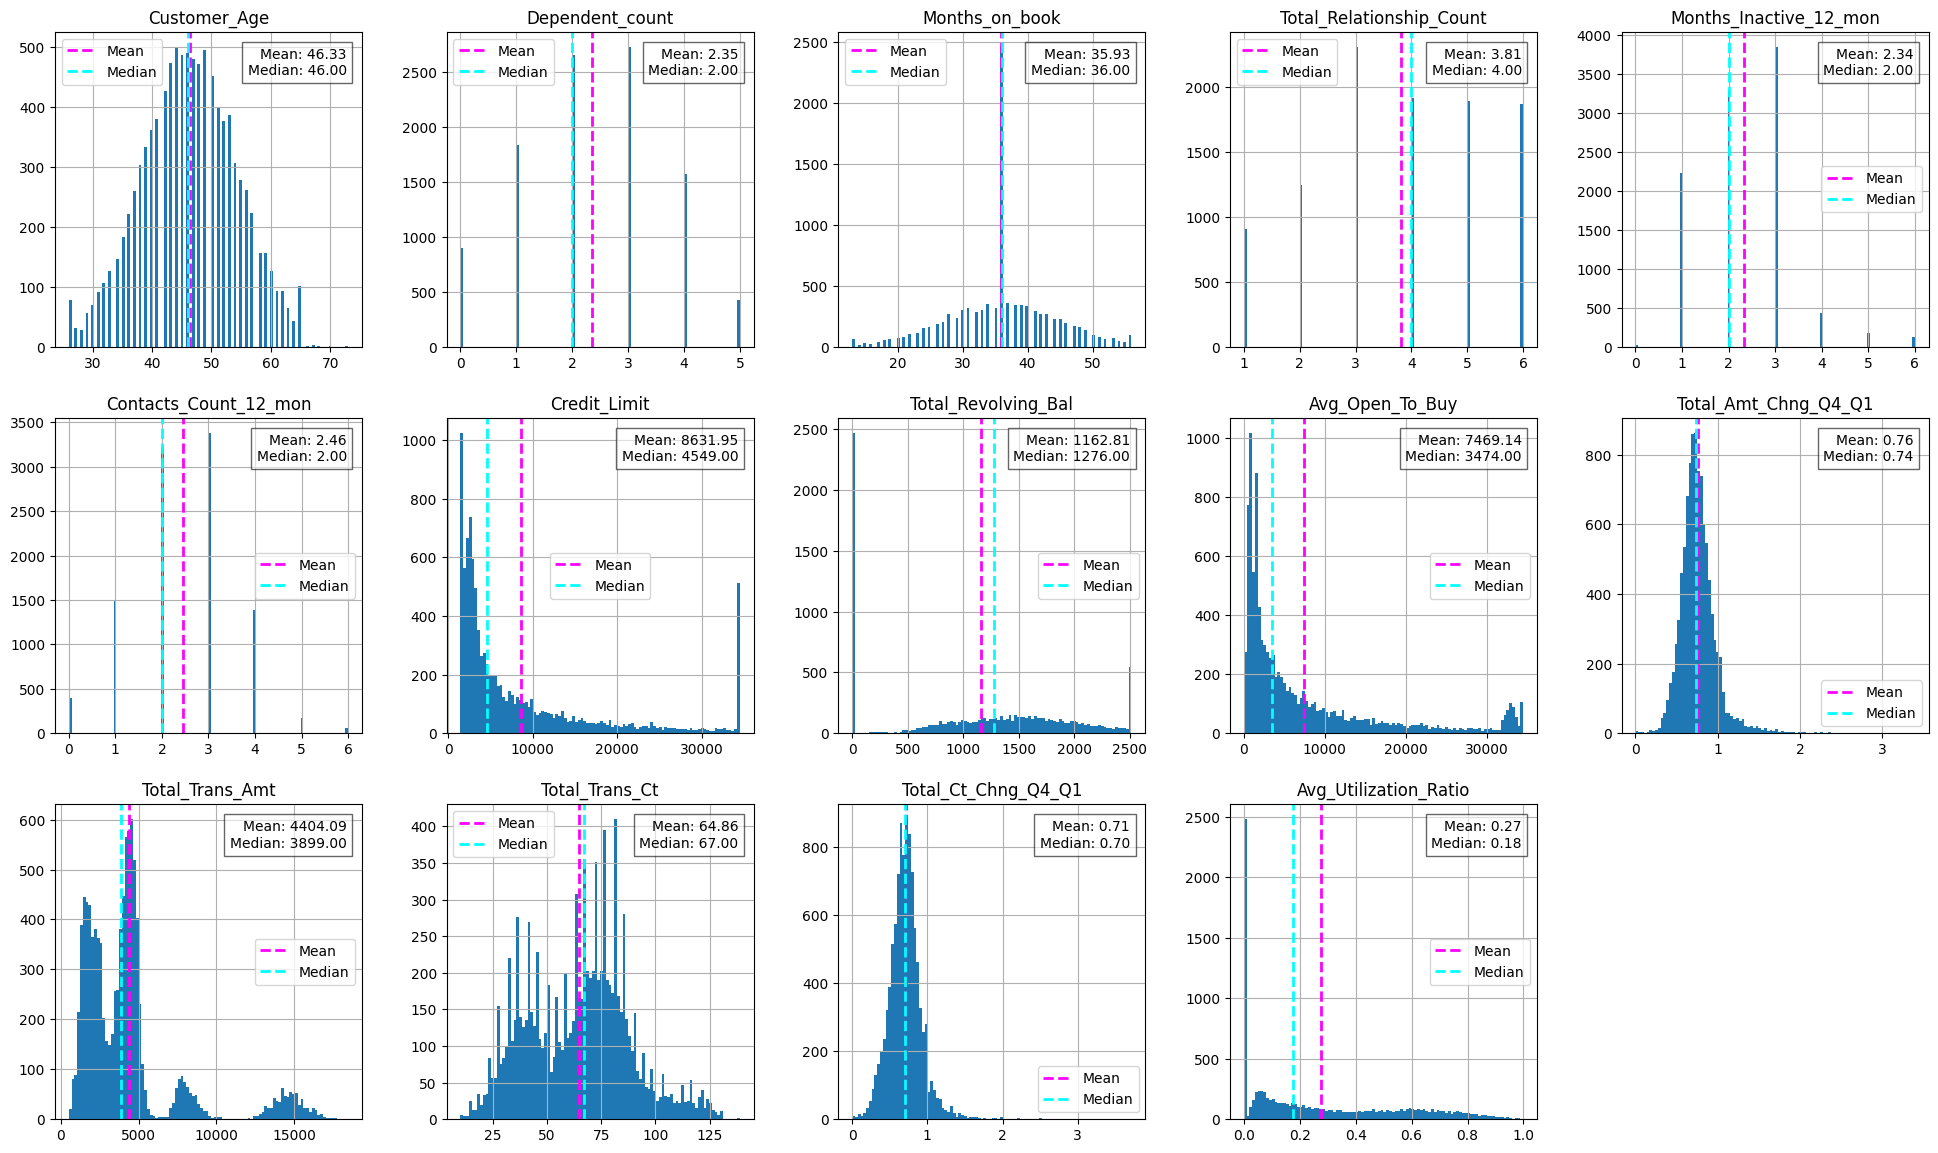

In [7]:
import matplotlib.pyplot as plt

def plot_histogram(df, col, ax):
    feature = df[col]
    feature.hist(bins=100, ax=ax)
    mean_val = feature.mean()
    median_val = feature.median()
    mean_line = ax.axvline(mean_val, color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    median_line = ax.axvline(median_val, color='cyan', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(col)
    # Add text for mean and median for easier interpretation
    ax.text(0.95, 0.95, f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}', 
            transform=ax.transAxes, fontsize=10, verticalalignment='top', 
            horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.6))
    ax.legend(handles=[mean_line, median_line])

numeric_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
                    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

num_features = len(numeric_features)
num_rows = (num_features + 5) // 6  # Ensures there's enough rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(numeric_features):
    plot_histogram(df, col, axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

**What we conclude with the histogram** <br>
1. Most features exhibit right-skewed distributions, including Credit_Limit, Total_Trans_Amt, and Avg_Open_To_Buy, indicating that a small group of customers have significantly higher values.

2. Customer_Age follows a near-normal distribution, with most customers between 40-50 years old, making them the primary demographic.

3. Dependent_count is left-skewed, as most customers have 1-3 dependents, while few have 4-5.

4. Transaction-related features (Total_Trans_Amt, Total_Trans_Ct) show a broad range, with some customers being highly active while others have minimal usage.

5. Avg_Utilization_Ratio is highly skewed, with most customers using a small portion of their credit, but some maxing out their limits.
___________

# Boxplot

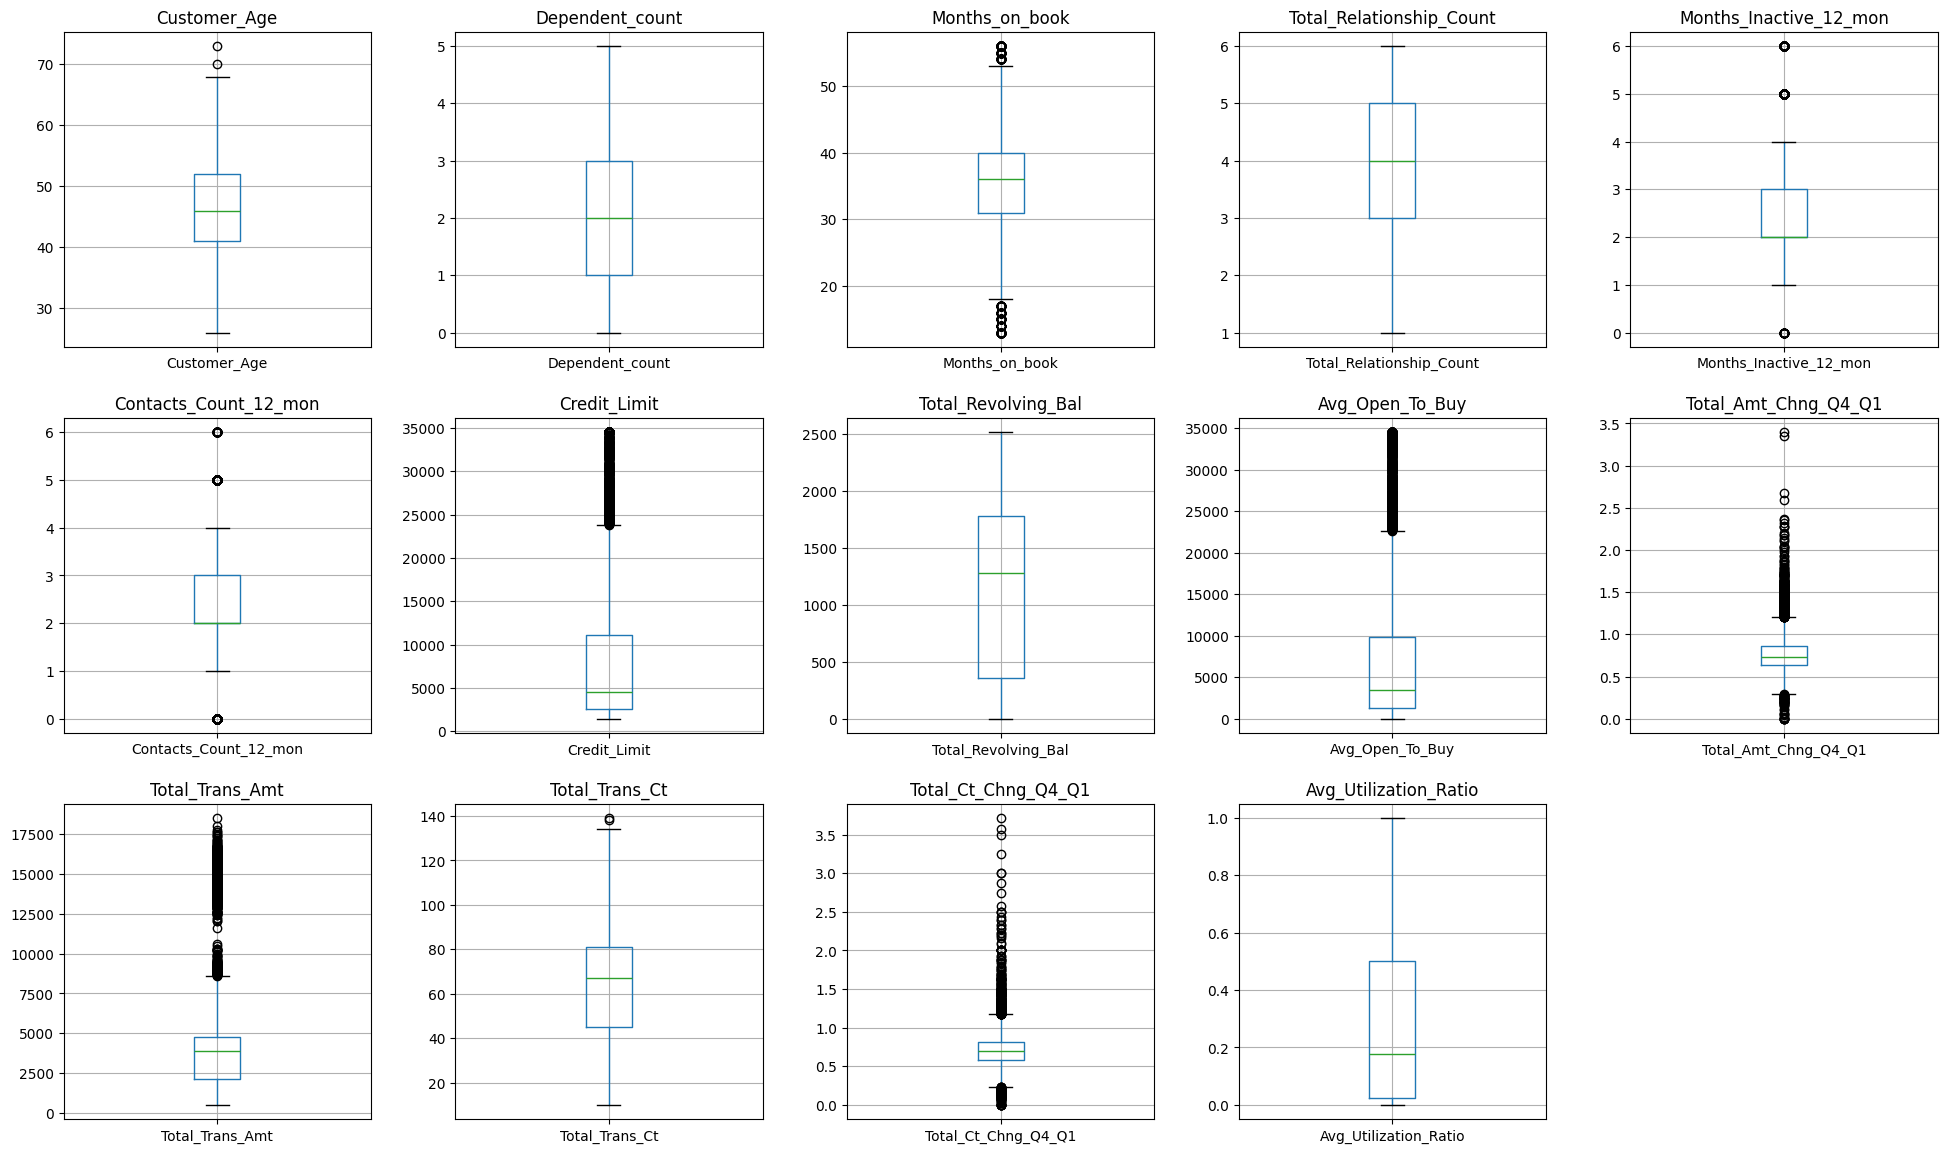

In [8]:
def plot_boxplot(df, col, ax):  # Function to create a boxplot
    df.boxplot(column=col, ax=ax)  # Create a boxplot for the column
    ax.set_title(col)
    
# Ensure the columns exist in the DataFrame
numeric_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
                    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

# Calculate the number of rows needed for 6 plots per line
num_features = len(numeric_features)
num_rows = (num_features + 5) // 6  # Ensures we have enough rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature as a boxplot
for i, col in enumerate(numeric_features):
    plot_boxplot(df, col, axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

**What we conclude with the boxplots** <br>
1. Significant outliers exist in financial features such as Credit_Limit, Total_Trans_Amt, and Total_Amt_Chng_Q4_Q1, suggesting that some customers have extreme spending or credit behaviors.

2. Customer_Age and Dependent_count have no major outliers, confirming stable distributions.

3. Transaction-related features exhibit high variability, meaning spending patterns vary widely among customers.

4. Avg_Utilization_Ratio shows extreme values close to 1.0, indicating that some customers are heavily reliant on their credit.

___

# Barchart

**The bar charts provide insights into the relationship between categorical features and customer attrition.**

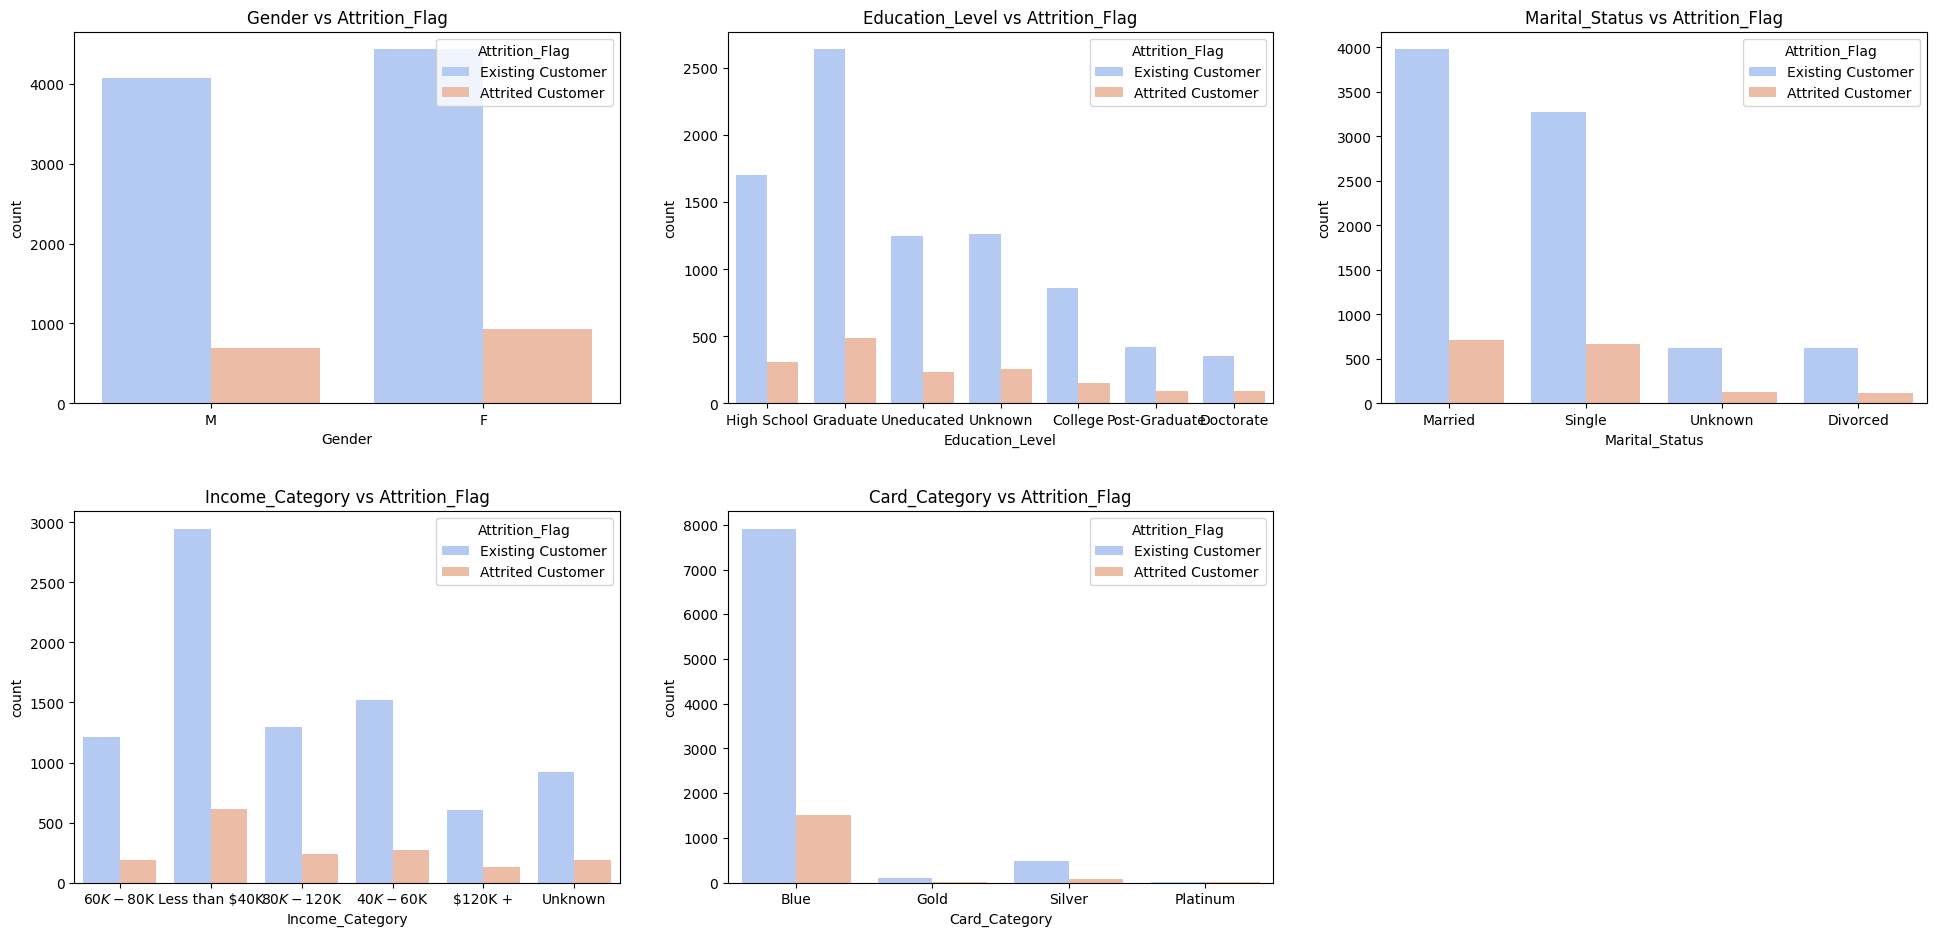

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Create a figure with subplots
plt.figure(figsize = (20, 10))

# Loop through each feature and create a count plot
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)  # Create a subplot in a 2x3 grid
    ax = sns.countplot(data=df, x=feature, hue='Attrition_Flag', palette='coolwarm')  # Create a count plot with hue as Attrition_Flag
    ax.set_title(f'{feature} vs Attrition_Flag')

# Adjust layout for better spacing
plt.tight_layout(pad = 3.0)
plt.show()

**What we conclude with the barcharts** <br>

Gender vs Attrition_Flag:
1. The attrition rate is similar between male and female customers, indicating that gender does not have a strong impact on customer churn.


Education_Level vs Attrition_Flag:
1. The majority of customers hold a Graduate or High School education, and most churned customers fall into these categories.
2. Customers with a Doctorate or no formal education (Uneducated) tend to have lower churn rates, possibly due to different spending behaviors or financial stability.


Marital_Status vs Attrition_Flag:
1. Married customers make up the largest group, but they also have a significant number of churned customers, suggesting marital status is not a strong churn predictor.
2. Customers with “Unknown” marital status show a lower churn rate, which could be influenced by data collection biases.


Income_Category vs Attrition_Flag:
1. Lower-income customers (Less than $40K) have the highest attrition rates, indicating that financial constraints might make them more likely to stop using the service.
2. High-income customers ($120K+) have lower churn rates, possibly due to greater financial stability and sustained credit usage.


Card_Category vs Attrition_Flag:
1. The majority of customers use the "Blue" credit card, and most churned customers come from this category.
2. Premium cardholders (Platinum, Gold, Silver) are fewer in number and show lower churn rates, suggesting that high-tier customers may have stronger loyalty or receive better retention incentives.


Conclusion:<br>
Based on the bar charts, Card Type (Card_Category) and Income Level (Income_Category) seem to have the most significant impact on customer attrition.
___

# Preprocessing the dataset

**Checking if there is any missing values.**

In [10]:
missing_values_series = df.isnull().sum()
print(missing_values_series)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


As we can see there is no missing values in the dataset. <br>

_______

**Transformation of features**

Here we are transforming categorical features.

In [11]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features excluding the target 'Attrition_Flag'
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Create a copy of the dataframe to avoid modifying the original data
df_encoded = df.copy()

# Apply LabelEncoder to each categorical feature
label_encoders = {}
for feature in categorical_features:
    labelEncoder = LabelEncoder()
    df_encoded[feature] = labelEncoder.fit_transform(df_encoded[feature])
    label_encoders[feature] = labelEncoder

# Convert Attrition_Flag (Target Variable) to 0 and 1
label_encoder_attrition = LabelEncoder()
df_encoded['Attrition_Flag'] = label_encoder_attrition.fit_transform(df_encoded['Attrition_Flag'])

# Store the encoder for future use (optional)
label_encoders['Attrition_Flag'] = label_encoder_attrition

# make sure all data are numeric
print(df_encoded.dtypes)
df_encoded.head() 

Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


**Result:**<br>
**Before the transformation** <br>
Attrition_Flag was defined as "Attrited Customer" & "Existing Customer". <br>
Gender was defined as "Female" & "Male".<br>
Education_Level was defined as "College", "Doctorate", "Graduated", "High School", "Post-Graduate", "Uneducated", "Unknown". <br>
Marital_Status was defined as "Divorced", "Married", "Single", "Unknown". <br>
Income_Category was defined as "$120K +", "$40K - $60K", "$60K - $80K", "$80K - $120K", "Less than $40K", "Unknown". <br>
Card_Category was defined as "Blue", "Gold", "Silver". <br>

**After the transformation (feature value is transformed respectfully)** <br>
Attrition_Flag was defined as "0" & "1". <br>
Gender was defined as "0" & "1".<br>
Education_Level was defined as "0", "1", "2", "2", "3", "4", "5". <br>
Marital_Status was defined as "0", "1", "2", "3". <br>
Income_Category was defined as "0","1", "2", "3", "4", "5". <br>
Card_Category was defined as "0", "1", "2". <br>
_______

# Correlation Matrix

**The reason we created a correlation matrix is to easier visualize the correlation between features**

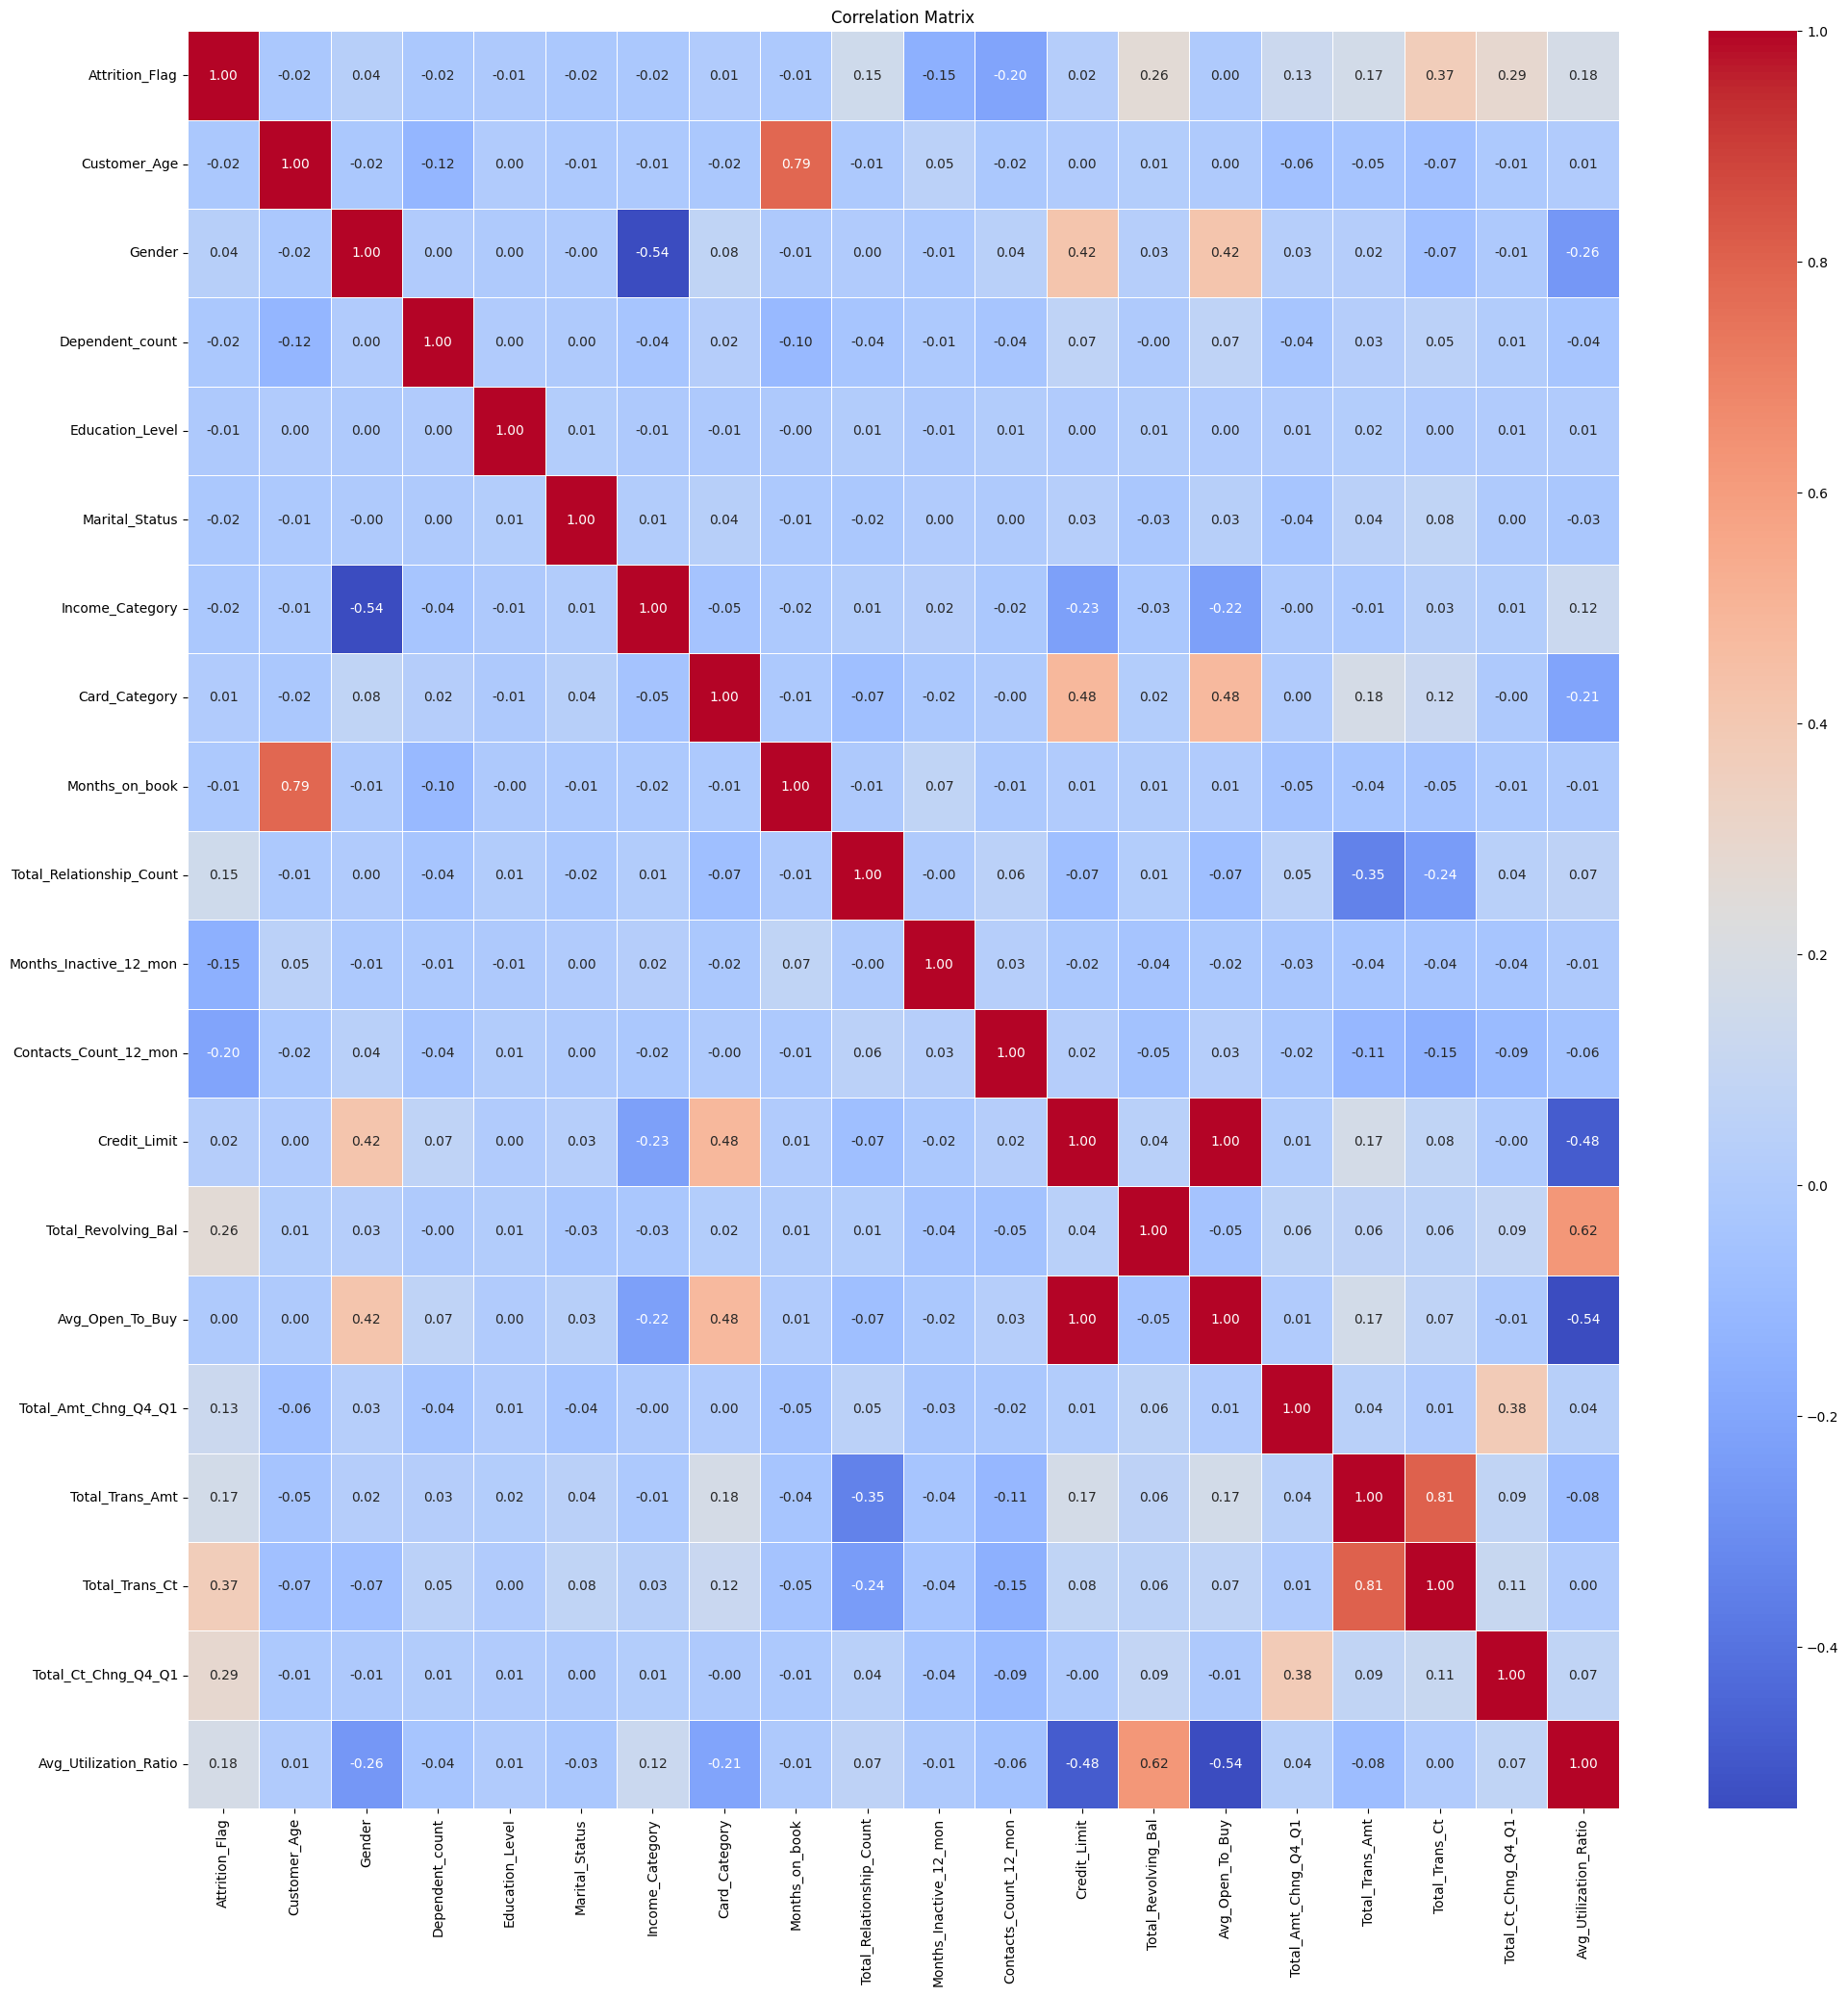

In [12]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize = (24,24))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title("Correlation Matrix")
plt.show()

**What we conclude from the correlation matrix:**<br>
Total Transactions Count is the strongest indicator of customer attrition: <br>
-> ~0.81, meaning customers who make more transactions generally spend more.

Credit behavior (Credit Limit, Utilization, and Open-to-Buy) is significantly related to spending patterns.<br>
-> Credit_Limit is positively correlated with Avg_Open_To_Buy (~0.48) & Total_Trans_Amt (~0.42), meaning customers with higher credit limits tend to have higher purchasing power and spending amounts.<br>
-> Credit_Limit is negatively correlated with Avg_Utilization_Ratio (~-0.48), implying that customers with high credit limits tend to have lower credit utilization rates.

Age and account tenure are strongly related, as expected.<br>
-> Customer_Age and Months_on_book have a strong correlation (~0.79), which makes sense because older customers have likely been with the company for a longer time.
_________

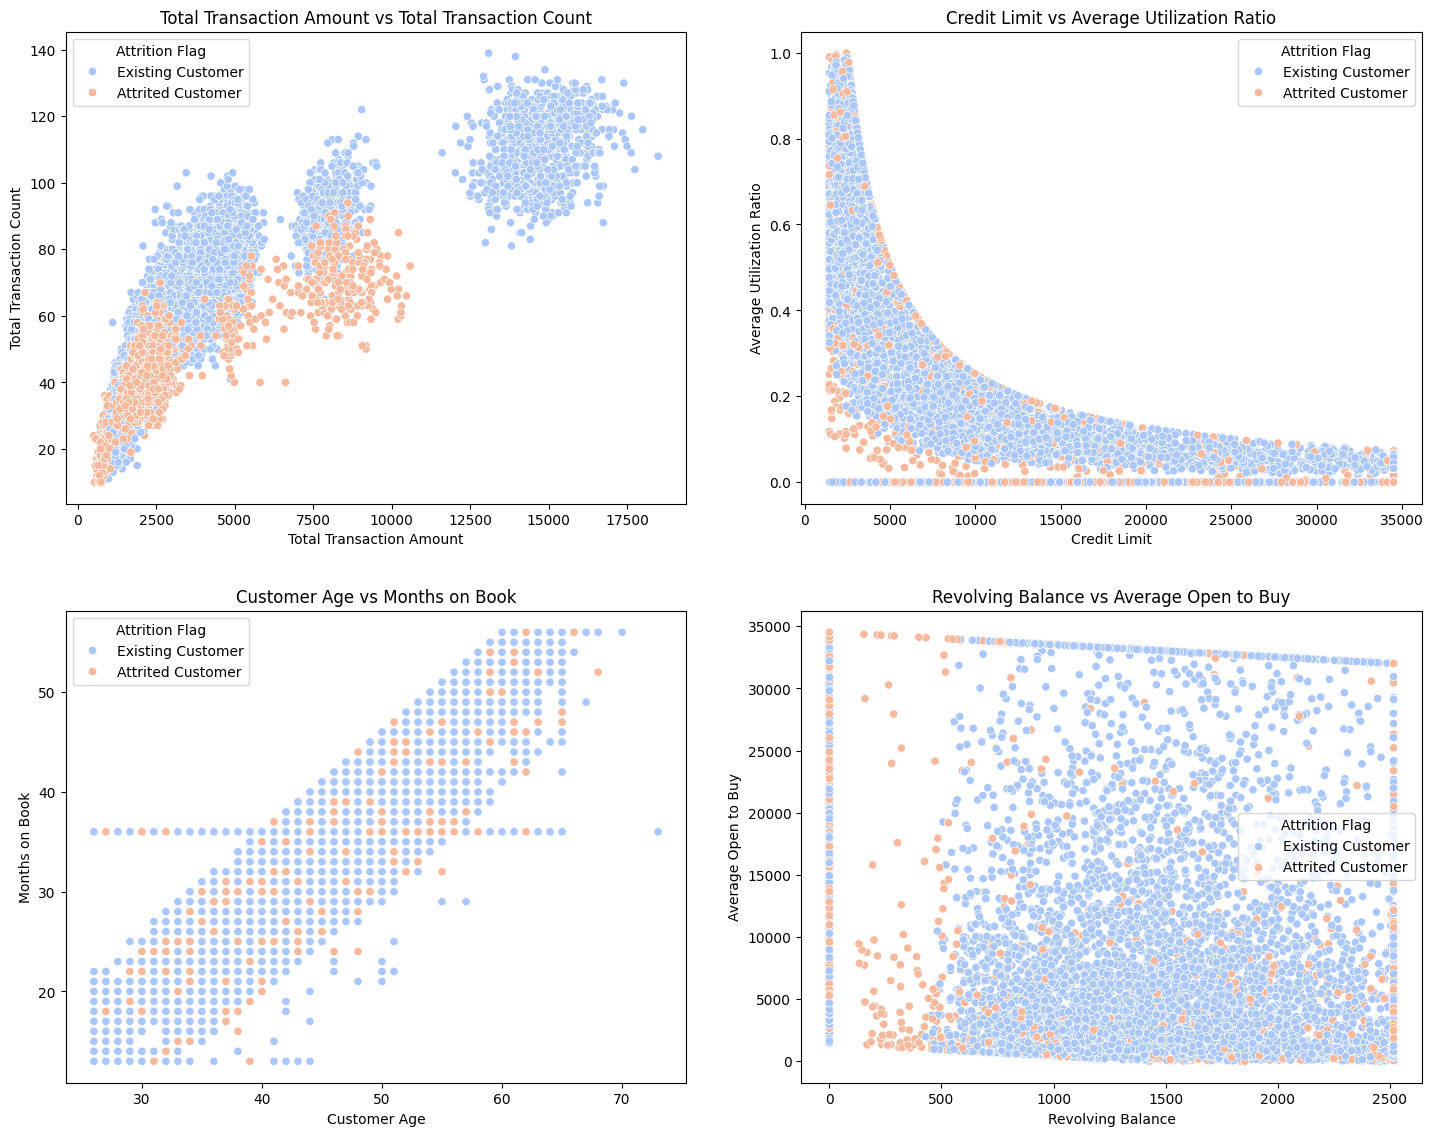

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plotting the relationship between Total Transaction Amount and Total Transaction Count
sns.scatterplot(data=df, x='Total_Trans_Amt', y='Total_Trans_Ct', hue='Attrition_Flag', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Total Transaction Amount vs Total Transaction Count')
axes[0, 0].set_xlabel('Total Transaction Amount')
axes[0, 0].set_ylabel('Total Transaction Count')
axes[0, 0].legend(title='Attrition Flag')

# Plotting the relationship between Credit Limit and Average Utilization Ratio
sns.scatterplot(data=df, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Attrition_Flag', palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Credit Limit vs Average Utilization Ratio')
axes[0, 1].set_xlabel('Credit Limit')
axes[0, 1].set_ylabel('Average Utilization Ratio')
axes[0, 1].legend(title='Attrition Flag')

# Plotting the relationship between Customer Age and Months on Book
sns.scatterplot(data=df, x='Customer_Age', y='Months_on_book', hue='Attrition_Flag', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Customer Age vs Months on Book')
axes[1, 0].set_xlabel('Customer Age')
axes[1, 0].set_ylabel('Months on Book')
axes[1, 0].legend(title='Attrition Flag')

# Plotting the relationship between Revolving Balance  and Average Open to Buy
sns.scatterplot(data=df, x='Total_Revolving_Bal', y='Avg_Open_To_Buy', hue='Attrition_Flag', palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Revolving Balance vs Average Open to Buy')
axes[1, 1].set_xlabel('Revolving Balance')
axes[1, 1].set_ylabel('Average Open to Buy')
axes[1, 1].legend(title='Attrition Flag')

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)
plt.show()

**Conclusion** <br>
Customers who has less transactions and have lower total spending are more likely to attrite. <br>
Higher credit utilization ratios and lower credit limits correlate with a higher likelihood of attrition.<br>
Shorter tenure customers may be at a higher risk of attrition.<br>
Customers with lower available credit (open to buy) might be more prone to leaving.
__________________

In [14]:
# Bining Total Transaction Amount
bins = [0, 3000, 6250, 11250, 20000]
labels = [0, 1, 2, 3]

# Create a new column 'Total_Trans_Amt_Binned' with binned values
df['Total_Trans_Amt_Binned'] = pd.cut(df['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows to verify the new column
df['Total_Trans_Amt_Binned'].describe() 

count     10127
unique        4
top           1
freq       4784
Name: Total_Trans_Amt_Binned, dtype: int64

In [15]:
#average amount per transaction
AmtPreTrans = df['Total_Trans_Amt'] / df['Total_Trans_Ct']
df['AmtPreTrans'] = AmtPreTrans
df['AmtPreTrans'].describe()
df['AmtPreTrans'].value_counts()

AmtPreTrans
53.000000     10
50.000000      8
44.000000      7
54.000000      7
59.000000      7
              ..
122.504065     1
113.037975     1
158.606061     1
153.990991     1
39.121212      1
Name: count, Length: 9256, dtype: int64

In [16]:
credit_capacity = df['Credit_Limit'] - df['Total_Revolving_Bal']

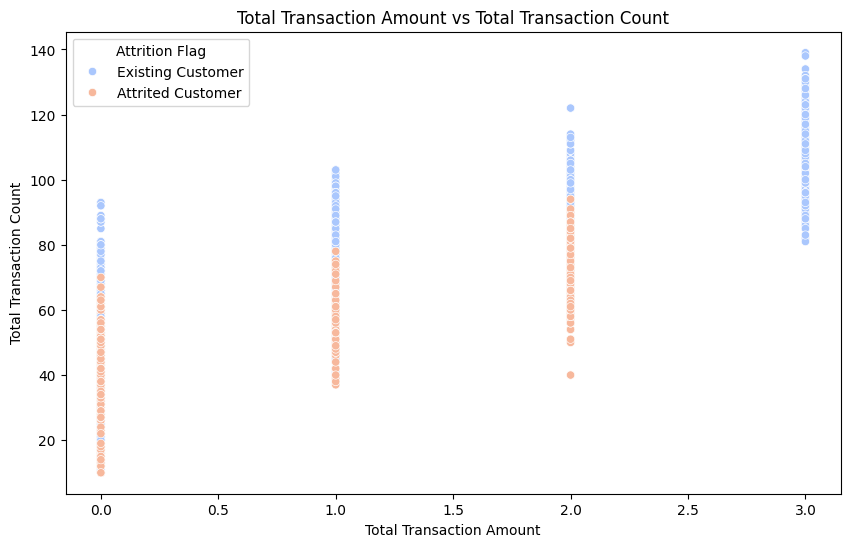

In [17]:
# Create a new figure and axes for the new plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the relationship between Total Transaction Amount and Total Transaction Count
sns.scatterplot(data=df, x='Total_Trans_Amt_Binned', y='Total_Trans_Ct', hue='Attrition_Flag', palette='coolwarm', ax=ax)
ax.set_title('Total Transaction Amount vs Total Transaction Count')
ax.set_xlabel('Total Transaction Amount')
ax.set_ylabel('Total Transaction Count')
ax.legend(title='Attrition Flag')

plt.show()

**Conclusion** <br>
Customers with lower transaction counts and transaction amounts are more likely to attrite. <br>

**Suggestion** <br>
Encouraging higher engagement and transaction volume could help reduce attrition.
_________

In [18]:
ct='Total_Trans_Ct'
amt='Total_Trans_Amt_Binned'
selected_attrition_flag = df.loc[(df[amt] == 3), 'Attrition_Flag']
selected_attrition_flag = pd.concat([selected_attrition_flag, df.loc[(df[ct] > 90) & (df[amt] == 2), 'Attrition_Flag']])
selected_attrition_flag = pd.concat([selected_attrition_flag, df.loc[(df[ct] > 75) & (df[amt] == 1), 'Attrition_Flag']])
selected_attrition_flag = pd.concat([selected_attrition_flag, df.loc[(df[ct] > 65) & (df[amt] == 0), 'Attrition_Flag']])

print(selected_attrition_flag.value_counts())

Attrition_Flag
Existing Customer    3327
Attrited Customer       5
Name: count, dtype: int64


_______________

# Model Performance Evaluation

**KNN modeling & stratified 5-fold**

Stratified 5-Fold Cross-Validation is a technique used to evaluate model performance while ensuring that the proportion of classes in each fold is preserved, with our dataset being imbalance, this technique comes to our mind. <br>

By using stratified 5-fold technique, we made sure all 5 folds has the same proportion of target class, so every fold has 16% attrited customer class, and then we apply KNN model in all 5 folds to see their performances.

Fold 1: Accuracy=0.8860, Precision=0.9180, Recall=0.9488
Confusion Matrix for Fold 1:
[[ 182  144]
 [  87 1613]]

Fold 2: Accuracy=0.8978, Precision=0.9283, Recall=0.9518
Confusion Matrix for Fold 2:
[[ 201  125]
 [  82 1618]]

Fold 3: Accuracy=0.8859, Precision=0.9219, Recall=0.9441
Confusion Matrix for Fold 3:
[[ 189  136]
 [  95 1605]]

Fold 4: Accuracy=0.8914, Precision=0.9248, Recall=0.9476
Confusion Matrix for Fold 4:
[[ 194  131]
 [  89 1611]]

Fold 5: Accuracy=0.8869, Precision=0.9191, Recall=0.9488
Confusion Matrix for Fold 5:
[[ 183  142]
 [  87 1613]]


Overall Performance:
Mean Accuracy: 0.8896
Mean Precision: 0.9224
Mean Recall: 0.9482

Overall Confusion Matrix:
[[ 949  678]
 [ 440 8060]]


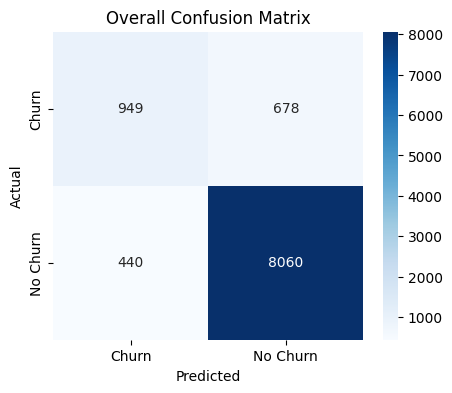

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define KNN Model
knn_model = KNeighborsClassifier(n_neighbors=3)# try 5/7

# Define Stratified K-Fold, make sure all fold has same proportion of target class
n_splits = 5  # 5-Fold cross validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

# store cross validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []

# initialize Confusion Matrix
overall_cm = np.zeros((2, 2), dtype=int)

# make sure X, y use df_encoded
X = df_encoded[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 
            'Marital_Status', 'Income_Category', 'Card_Category', 
            'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y = df_encoded['Attrition_Flag']

# start cross validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train KNN
    knn_model.fit(X_train, y_train)

    # Predict
    y_pred = knn_model.predict(X_test)

    # calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    # store results
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    conf_matrices.append(cm)

    # add Confusion Matrix together
    overall_cm += cm

    # print fold results
    print(f"Fold {fold+1}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")
    print(f"Confusion Matrix for Fold {fold+1}:\n{cm}\n")

# average performance
print("\nOverall Performance:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")

# print Overall Confusion Matrix
print("\nOverall Confusion Matrix:")
print(overall_cm)

# visualize Overall Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix")
plt.show()

**Conclusion from KNN modeling & stratified 5-fold technique:**<br>
The accuracy across all 5 folds is consistent, ranging from 0.8859 to 0.8978, meaning the KNN model generalizes well and is not overfitting nor underfitting.<br>
Precision 0.9180 - 0.9283 and recall 0.9441 - 0.9518 values are also stable, indicating the model is making reliable predictions as we want.

The model performs well on predicting "Churn" with 8060 True Positives and only 440 False Negatives, indicating it successfully identifies most churn cases.<br>
However, it misclassifies 678 instances of No Churn as Churn (False Positives), which might be a concern if false alarms are costly.

Challenges we currently face: <br>
The false positive rate might require tuning, maybe using different thresholds or another classifier like Random Forest or Logistic Regression can help this challenge.
_____________

**Naive Bayes modeling & stratified 5-fold**

Fold 1: Accuracy=0.8988, Precision=0.9323, Recall=0.9482
Confusion Matrix for Fold 1:
[[ 209  117]
 [  88 1612]]

Fold 2: Accuracy=0.8870, Precision=0.9299, Recall=0.9359
Confusion Matrix for Fold 2:
[[ 206  120]
 [ 109 1591]]

Fold 3: Accuracy=0.8914, Precision=0.9287, Recall=0.9429
Confusion Matrix for Fold 3:
[[ 202  123]
 [  97 1603]]

Fold 4: Accuracy=0.8983, Precision=0.9298, Recall=0.9506
Confusion Matrix for Fold 4:
[[ 203  122]
 [  84 1616]]

Fold 5: Accuracy=0.8948, Precision=0.9305, Recall=0.9453
Confusion Matrix for Fold 5:
[[ 205  120]
 [  93 1607]]


Overall Performance for Naïve Bayes:
Mean Accuracy: 0.8940
Mean Precision: 0.9303
Mean Recall: 0.9446

Overall Confusion Matrix for Naïve Bayes:
[[1025  602]
 [ 471 8029]]


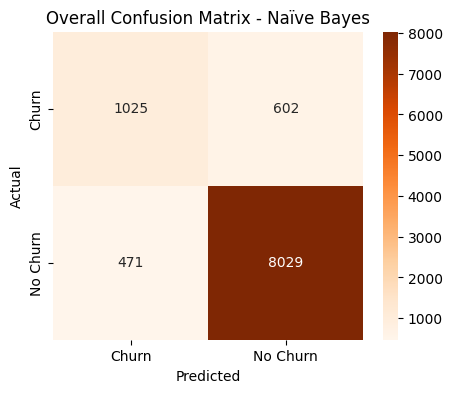

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define Naïve Bayes Model
nb_model = GaussianNB()

# define Stratified K-Fold
n_splits = 5  # 5-Fold cross validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

# store cross validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []

# initialize Confusion Matrix
overall_cm = np.zeros((2, 2), dtype=int)

# make sure X, y use df_encoded
X = df_encoded[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 
            'Marital_Status', 'Income_Category', 'Card_Category', 
            'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y = df_encoded['Attrition_Flag']

# start cross validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train Naïve Bayes
    nb_model.fit(X_train, y_train)

    # predict
    y_pred = nb_model.predict(X_test)

    # calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    # store results
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    conf_matrices.append(cm)

    # add Confusion Matrix together
    overall_cm += cm

    # print fold results
    print(f"Fold {fold+1}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")
    print(f"Confusion Matrix for Fold {fold+1}:\n{cm}\n")

# average performance
print("\nOverall Performance for Naïve Bayes:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")

# print Overall Confusion Matrix
print("\nOverall Confusion Matrix for Naïve Bayes:")
print(overall_cm)

# visualize Overall Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix - Naïve Bayes")
plt.show()

**Decision Tree**

Fold 1: Accuracy=0.9215, Precision=0.9341, Recall=0.9753
Confusion Matrix for Fold 1:
[[ 209  117]
 [  42 1658]]

Fold 2: Accuracy=0.9205, Precision=0.9451, Recall=0.9612
Confusion Matrix for Fold 2:
[[ 231   95]
 [  66 1634]]

Fold 3: Accuracy=0.9235, Precision=0.9347, Recall=0.9771
Confusion Matrix for Fold 3:
[[ 209  116]
 [  39 1661]]

Fold 4: Accuracy=0.9185, Precision=0.9329, Recall=0.9729
Confusion Matrix for Fold 4:
[[ 206  119]
 [  46 1654]]

Fold 5: Accuracy=0.9225, Precision=0.9284, Recall=0.9835
Confusion Matrix for Fold 5:
[[ 196  129]
 [  28 1672]]


Overall Performance for SVM:
Mean Accuracy: 0.9213
Mean Precision: 0.9350
Mean Recall: 0.9740

Overall Confusion Matrix for SVM:
[[1051  576]
 [ 221 8279]]


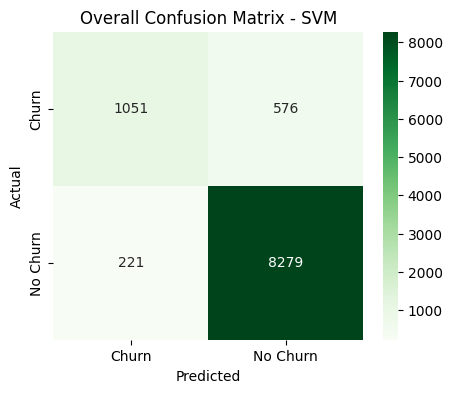

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# define tree model（use linear kernel）
tree_model = DecisionTreeClassifier(max_depth=4, random_state=0)  # set max_depth to 4 to avoid overfitting

#Stratified 5-Fold
n_splits = 5  # 5-Fold cross validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

# store cross validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []

# initialize Confusion Matrix
overall_cm = np.zeros((2, 2), dtype=int)

# make sure X, y use df_encoded
X = df_encoded[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 
            'Marital_Status', 'Income_Category', 'Card_Category', 
            'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y = df_encoded['Attrition_Flag']

# start cross validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train SVM
    tree_model.fit(X_train, y_train)

    # predict
    y_pred = tree_model.predict(X_test)

    # calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    # store results
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    conf_matrices.append(cm)

    # add Confusion Matrix together
    overall_cm += cm

    # print fold results
    print(f"Fold {fold+1}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")
    print(f"Confusion Matrix for Fold {fold+1}:\n{cm}\n")

# calculate average performance
print("\nOverall Performance for SVM:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")

# print Overall Confusion Matrix
print("\nOverall Confusion Matrix for SVM:")
print(overall_cm)

# visualize Overall Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix - SVM")
plt.show()

**SVC modeling & stratified 5-fold**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# define SVM model（use linear kernel）
svm_model = SVC(kernel='linear', gamma='scale')

#Stratified 5-Fold
n_splits = 5  # 5-Fold cross validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

# store cross validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []

# initialize Confusion Matrix
overall_cm = np.zeros((2, 2), dtype=int)

# make sure X, y use df_encoded
X = df_encoded[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 
            'Marital_Status', 'Income_Category', 'Card_Category', 
            'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y = df_encoded['Attrition_Flag']

# start cross validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train SVM
    svm_model.fit(X_train, y_train)

    # predict
    y_pred = svm_model.predict(X_test)

    # calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    # store results
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    conf_matrices.append(cm)

    # add Confusion Matrix together
    overall_cm += cm

    # print fold results
    print(f"Fold {fold+1}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")
    print(f"Confusion Matrix for Fold {fold+1}:\n{cm}\n")

# calculate average performance
print("\nOverall Performance for SVM:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")

# print Overall Confusion Matrix
print("\nOverall Confusion Matrix for SVM:")
print(overall_cm)

# visualize Overall Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix - SVM")
plt.show()

Fold 1: Accuracy=0.8968, Precision=0.9130, Recall=0.9694
Confusion Matrix for Fold 1:
[[ 169  157]
 [  52 1648]]

Fold 2: Accuracy=0.8825, Precision=0.9107, Recall=0.9535
Confusion Matrix for Fold 2:
[[ 167  159]
 [  79 1621]]

Fold 3: Accuracy=0.8760, Precision=0.9018, Recall=0.9565
Confusion Matrix for Fold 3:
[[ 148  177]
 [  74 1626]]



# Decision Tree

**Implementing Decision Tree to check the importance of different feature in classification task**

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# train a Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=4, random_state=0)  # set max_depth to 4 to avoid overfitting
tree_model.fit(X, y)

# visualize the Decision Tree
plt.figure(figsize=(20, 12))
plot_tree(tree_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Calculate Feature Importance
feature_importances = tree_model.feature_importances_

# Create a DataFrame 
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)  # order by importance

# print top 10 important features
print("\nTop 10 Important Features:")
print(importance_df.head(10))

# display the Feature Importance
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # invert y-axis to show the most important feature on top
plt.show()

NameError: name 'X' is not defined

# Implementing prediction modeling after knowing the top 10 features

**KNN modeling & stratified 5-fold with top 10 features**


Selected Top Features for KNN: ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Months_Inactive_12_mon', 'Customer_Age', 'Dependent_count', 'Gender', 'Education_Level']
Fold 1: Accuracy=0.8968, Precision=0.9327, Recall=0.9453
Confusion Matrix for Fold 1:
[[ 210  116]
 [  93 1607]]

Fold 2: Accuracy=0.8978, Precision=0.9313, Recall=0.9482
Confusion Matrix for Fold 2:
[[ 207  119]
 [  88 1612]]

Fold 3: Accuracy=0.8953, Precision=0.9296, Recall=0.9471
Confusion Matrix for Fold 3:
[[ 203  122]
 [  90 1610]]

Fold 4: Accuracy=0.9012, Precision=0.9310, Recall=0.9529
Confusion Matrix for Fold 4:
[[ 205  120]
 [  80 1620]]

Fold 5: Accuracy=0.9042, Precision=0.9368, Recall=0.9500
Confusion Matrix for Fold 5:
[[ 216  109]
 [  85 1615]]


Overall Performance:
Mean Accuracy: 0.8991
Mean Precision: 0.9323
Mean Recall: 0.9487

Overall Confusion Matrix:
[[1041  586]
 [ 436 8064]]


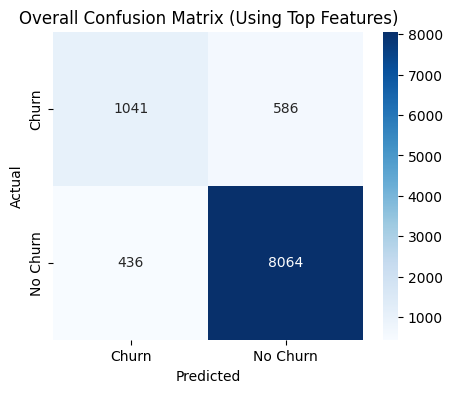

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# select top 10 important features
top_n = 10  # select top 10 features
top_features = importance_df.head(top_n)['Feature'].tolist()

print("\nSelected Top Features for KNN:", top_features)

# only use top features
X_selected = df_encoded[top_features]
y = df_encoded['Attrition_Flag']

# define KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# 5-Fold Cross Validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

# store cross validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []

# initialize Confusion Matrix
overall_cm = np.zeros((2, 2), dtype=int)

# start cross validation
for fold, (train_index, test_index) in enumerate(skf.split(X_selected, y)):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train KNN
    knn_model.fit(X_train, y_train)

    # predict
    y_pred = knn_model.predict(X_test)

    # calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    # store results
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    conf_matrices.append(cm)

    # add Confusion Matrix together
    overall_cm += cm

    # print fold results
    print(f"Fold {fold+1}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")
    print(f"Confusion Matrix for Fold {fold+1}:\n{cm}\n")

# calculate average performance
print("\nOverall Performance:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")

# print Overall Confusion Matrix
print("\nOverall Confusion Matrix:")
print(overall_cm)

# visualize Overall Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix (Using Top Features)")
plt.show()

**Naive Bayes modeling & stratified 5-fold with top 10 features**


Selected Top Features for Naïve Bayes: ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Months_Inactive_12_mon', 'Customer_Age', 'Dependent_count', 'Gender', 'Education_Level']
Fold 1: Accuracy=0.8998, Precision=0.9354, Recall=0.9459
Confusion Matrix for Fold 1:
[[ 215  111]
 [  92 1608]]

Fold 2: Accuracy=0.8954, Precision=0.9336, Recall=0.9424
Confusion Matrix for Fold 2:
[[ 212  114]
 [  98 1602]]

Fold 3: Accuracy=0.8923, Precision=0.9303, Recall=0.9424
Confusion Matrix for Fold 3:
[[ 205  120]
 [  98 1602]]

Fold 4: Accuracy=0.9047, Precision=0.9363, Recall=0.9512
Confusion Matrix for Fold 4:
[[ 215  110]
 [  83 1617]]

Fold 5: Accuracy=0.8973, Precision=0.9327, Recall=0.9459
Confusion Matrix for Fold 5:
[[ 209  116]
 [  92 1608]]


Overall Performance for Naïve Bayes (Using Top Features):
Mean Accuracy: 0.8979
Mean Precision: 0.9337
Mean Recall: 0.9455

Overall Confusion Matrix for Naïve Bayes (Using Top Features):


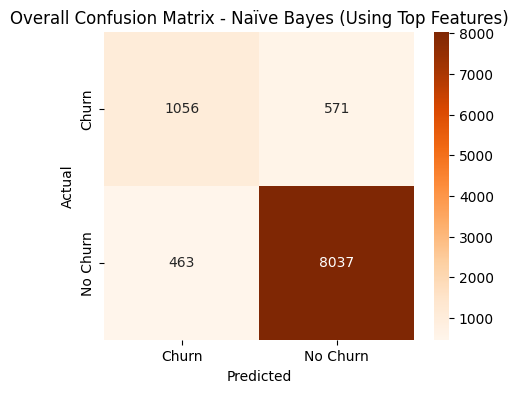

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# define Naïve Bayes Model
top_n = 10  # select top 10 features
top_features = importance_df.head(top_n)['Feature'].tolist()

print("\nSelected Top Features for Naïve Bayes:", top_features)

# only use top features
X_selected = df_encoded[top_features]
y = df_encoded['Attrition_Flag']

# define Naïve Bayes model
nb_model = GaussianNB()

# 5-Fold Cross Validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

# store cross validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []

# initialize Confusion Matrix
overall_cm = np.zeros((2, 2), dtype=int)

# start cross validation
for fold, (train_index, test_index) in enumerate(skf.split(X_selected, y)):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train Naïve Bayes
    nb_model.fit(X_train, y_train)

    # predict
    y_pred = nb_model.predict(X_test)

    # calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    # store results
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    conf_matrices.append(cm)

    # add Confusion Matrix together
    overall_cm += cm

    # print fold results
    print(f"Fold {fold+1}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")
    print(f"Confusion Matrix for Fold {fold+1}:\n{cm}\n")

# calculate average performance
print("\nOverall Performance for Naïve Bayes (Using Top Features):")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")

# print Overall Confusion Matrix
print("\nOverall Confusion Matrix for Naïve Bayes (Using Top Features):")
print(overall_cm)

# visualize Overall Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix - Naïve Bayes (Using Top Features)")
plt.show()

**SVC modeling & stratified 5-fold with top 10 features**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# define SVM model（use linear kernel）
top_n = 10  # select top 10 features
top_features = importance_df.head(top_n)['Feature'].tolist()

print("\nSelected Top Features for SVM:", top_features)

# only use top features
X_selected = df_encoded[top_features]
y = df_encoded['Attrition_Flag']

# define SVM model
svm_model = SVC(kernel='linear', gamma='scale')

# 5-Fold Cross Validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

# store cross validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []

# initialize Confusion Matrix
overall_cm = np.zeros((2, 2), dtype=int)

# start cross validation
for fold, (train_index, test_index) in enumerate(skf.split(X_selected, y)):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train SVM
    svm_model.fit(X_train, y_train)

    # predict
    y_pred = svm_model.predict(X_test)

    # calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    # store results
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    conf_matrices.append(cm)

    # add Confusion Matrix together
    overall_cm += cm

    # print fold results
    print(f"Fold {fold+1}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")
    print(f"Confusion Matrix for Fold {fold+1}:\n{cm}\n")

# calculate average performance
print("\nOverall Performance for SVM (Using Top Features):")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")

# print Overall Confusion Matrix
print("\nOverall Confusion Matrix for SVM (Using Top Features):")
print(overall_cm)

# visualize Overall Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix - SVM (Using Top Features)")
plt.show()


Selected Top Features for SVM: ['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Months_Inactive_12_mon', 'Customer_Age', 'Dependent_count', 'Gender', 'Education_Level']
Fold 1: Accuracy=0.8954, Precision=0.9331, Recall=0.9429
Confusion Matrix for Fold 1:
[[ 211  115]
 [  97 1603]]

Fold 2: Accuracy=0.8880, Precision=0.9330, Recall=0.9335
Confusion Matrix for Fold 2:
[[ 212  114]
 [ 113 1587]]

Fold 3: Accuracy=0.8904, Precision=0.9124, Recall=0.9618
Confusion Matrix for Fold 3:
[[ 168  157]
 [  65 1635]]



# Outliers Detection and removal

In [ ]:
import numpy as np
import pandas as pd

numerical_features = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
                      'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Q1 = df_encoded[numerical_features].quantile(0.25)
Q3 = df_encoded[numerical_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df_encoded[numerical_features] < lower_bound) | (df_encoded[numerical_features] > upper_bound))

outlier_counts = outliers.sum()
print("\nNumber of Outliers in Each Feature:")
print(outlier_counts)

df_no_outliers = df_encoded[~outliers.any(axis=1)].copy()

print(f"\nOriginal dataset size: {df_encoded.shape}")
print(f"After removing outliers: {df_no_outliers.shape}")


Number of Outliers in Each Feature:
Customer_Age               2
Months_on_book           386
Credit_Limit             984
Total_Revolving_Bal        0
Avg_Open_To_Buy          963
Total_Amt_Chng_Q4_Q1     396
Total_Trans_Amt          896
Total_Trans_Ct             2
Total_Ct_Chng_Q4_Q1      394
Avg_Utilization_Ratio      0
dtype: int64

Original dataset size: (10127, 22)
After removing outliers: (7509, 22)


**Implementing KNN modeling once again after outlier removal**

Fold 1: Accuracy=0.9015, Precision=0.9285, Recall=0.9552
Confusion Matrix for Fold 1:
[[ 160   92]
 [  56 1194]]

Fold 2: Accuracy=0.8915, Precision=0.9263, Recall=0.9448
Confusion Matrix for Fold 2:
[[ 158   94]
 [  69 1181]]

Fold 3: Accuracy=0.8988, Precision=0.9330, Recall=0.9464
Confusion Matrix for Fold 3:
[[ 167   85]
 [  67 1183]]

Fold 4: Accuracy=0.8935, Precision=0.9218, Recall=0.9528
Confusion Matrix for Fold 4:
[[ 152  101]
 [  59 1190]]

Fold 5: Accuracy=0.8881, Precision=0.9226, Recall=0.9448
Confusion Matrix for Fold 5:
[[ 153   99]
 [  69 1180]]


Overall Performance for KNN after Removing Outliers:
Mean Accuracy: 0.8947
Mean Precision: 0.9264
Mean Recall: 0.9488

Overall Confusion Matrix for KNN (After Removing Outliers):
[[ 790  471]
 [ 320 5928]]


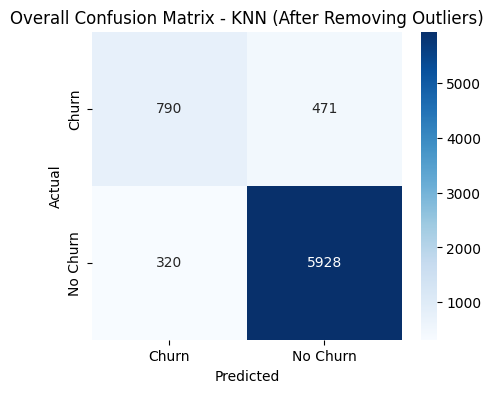

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df_no_outliers[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 
            'Marital_Status', 'Income_Category', 'Card_Category', 
            'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y = df_no_outliers['Attrition_Flag']

knn_model = KNeighborsClassifier(n_neighbors=3)

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []

overall_cm = np.zeros((2, 2), dtype=int)

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    conf_matrices.append(cm)

    overall_cm += cm

    print(f"Fold {fold+1}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")
    print(f"Confusion Matrix for Fold {fold+1}:\n{cm}\n")

print("\nOverall Performance for KNN after Removing Outliers:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")

print("\nOverall Confusion Matrix for KNN (After Removing Outliers):")
print(overall_cm)

plt.figure(figsize=(5, 4))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix - KNN (After Removing Outliers)")
plt.show()